In [1]:
import datapoint
import matplotlib.pyplot as plt

## Setting up the datapoint connection and setting a site

In [13]:
#Create datapoint connection, insert your own key here
conn = datapoint.Manager(api_key="36d8c8c2-03db-4478-9c50-016c2fb97da1")

#Get nearest site and print out its name and other example details
site = conn.get_nearest_forecast_site(52.633, -1.133)
print("Site name - " + str(site.name))
print("Latitude and longitude - " + "[" + str(site.latitude) + ', ' + str(site.longitude) + "]")
print("Region - " + str(site.unitaryAuthArea))

#Get a forecast for the nearest site, with intervals of 3 hours
forecast = conn.get_forecast_for_site(site.id, "3hourly")

Site name - Leicester
Latitude and longitude - [52.6365, -1.1382]
Region - Leicester


## Example of printing the daily temperature high/lows for the next 5 days

In [10]:
for day in forecast.days:
    print("\n%s" % day.date.date())
    temps = []
    # Loop through time steps and print out info
    for timestep in day.timesteps:
        temps.append(timestep.temperature.value)
    print(min(temps), max(temps))



2022-09-02
17 22

2022-09-03
16 23

2022-09-04
16 21

2022-09-05
16 22

2022-09-06
15 21


## Plotting humidity over the next 5 days

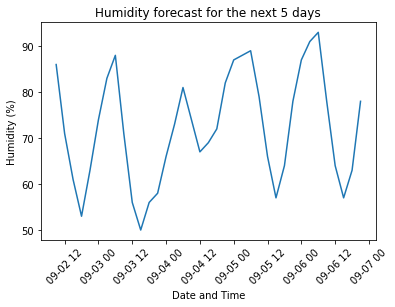

In [5]:
humidity = []
days = []
for day in forecast.days:
    # Loop through time steps and print out info
    for timestep in day.timesteps:
        humidity.append(timestep.humidity.value)
        days.append(timestep.date)

    
plt.plot(days, humidity)
plt.xlabel("Date and Time")
plt.ylabel("Humidity (%)")
plt.title("Humidity forecast for the next 5 days")
plt.xticks(rotation = 45)
plt.show()